(10886, 12)
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


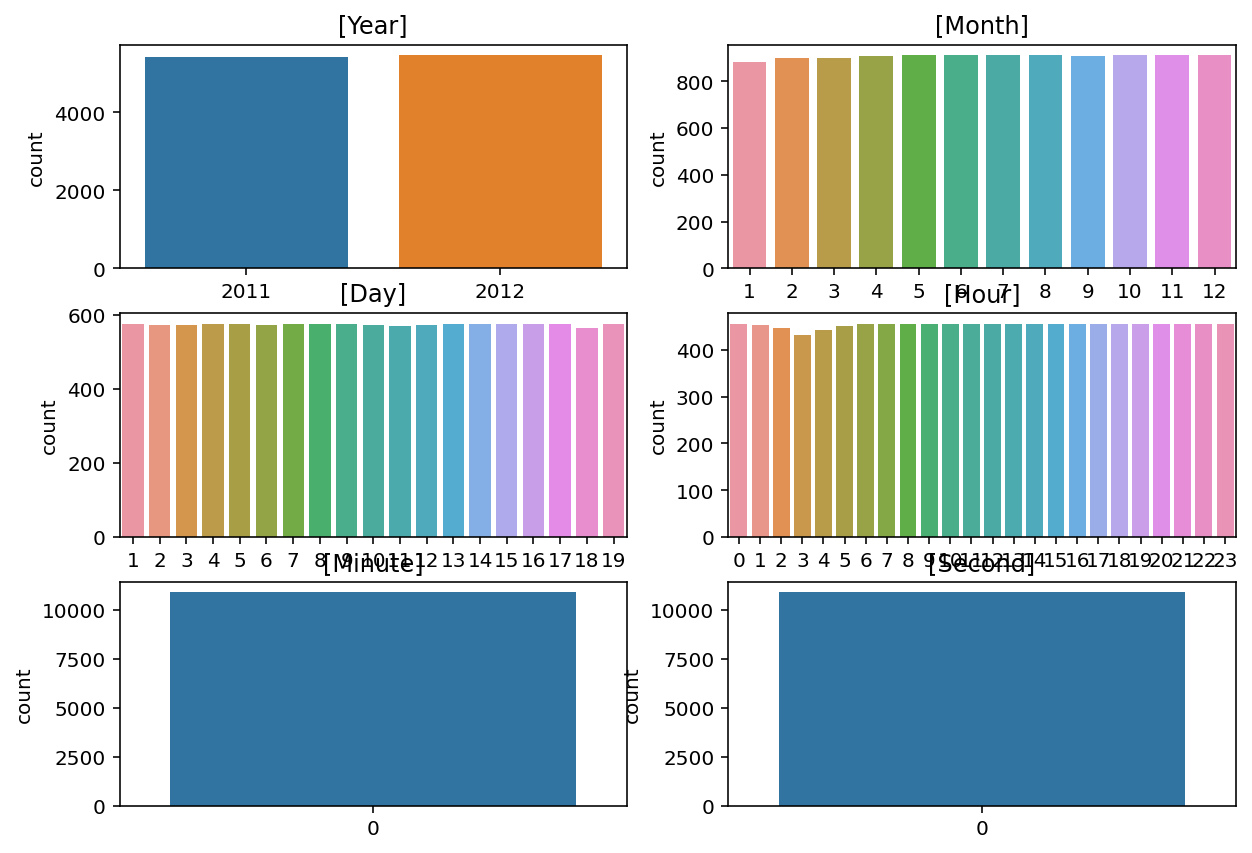

(10886, 11)
(10886,)
[147.49869318  15.85298589 199.79771686 ... 453.73506634  20.3024299
 241.45067526]
mse : 1164.5754463467217
rmse: 34.12587649199243


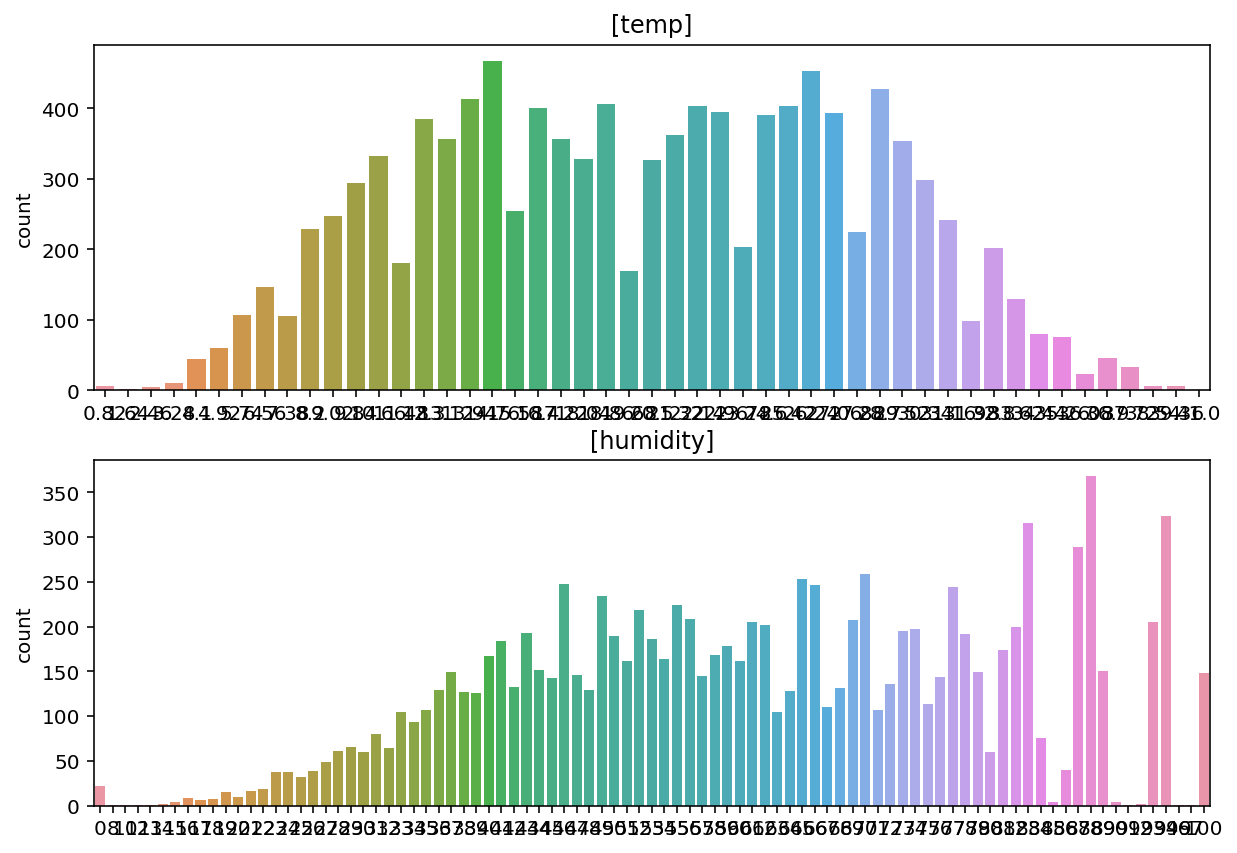

In [39]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# (1) data 가져오기
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
print(train.head())

#train.datetime
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train["InsertedDateTime"] = pd.to_datetime( train.datetime )

train["year"] = train["InsertedDateTime"].dt.year
train["month"] = train["InsertedDateTime"].dt.month
train["day"] = train["InsertedDateTime"].dt.day
train["hour"] = train["InsertedDateTime"].dt.hour
train["minute"] = train["InsertedDateTime"].dt.minute
train["second"] = train["InsertedDateTime"].dt.second

train.head()

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(321)
sns.countplot(data=train, x='year').set_xlabel('')
plt.title("[Year]")

plt.subplot(322)
sns.countplot(data=train, x="month").set_xlabel('')
plt.title("[Month]")

plt.subplot(323)
sns.countplot(data=train, x='day').set_xlabel('')
plt.title("[Day]")

plt.subplot(324)
sns.countplot(data=train, x="hour").set_xlabel('')
plt.title("[Hour]")

plt.subplot(325)
sns.countplot(data=train, x='minute').set_xlabel('')
plt.title("[Minute]")

plt.subplot(326)
sns.countplot(data=train, x="second").set_xlabel('')
plt.title("[Second]")

plt.show()

#(4) X, y 컬럼 선택 및 train/test 데이터 분리
X = train[['season', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'registered', 'year', 'month', 'day', 'hour']].values
y = train['count'].values

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# (5) LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
predictions = model.predict(X_test)
print(predictions)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("mse :", mse)

#from sklearn.metrics import root_mean_squared_error
#rmse = root_mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print("rmse:", rmse)

#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.figure(figsize=(10, 7))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=train, x='temp').set_xlabel('')
plt.title("[temp]")
plt.subplot(212)
sns.countplot(data=train, x='humidity').set_xlabel('')
plt.title("[humidity]")
plt.show()